<a href="https://colab.research.google.com/github/brilianputraa/deepiduav/blob/master/DEEPIDUAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# System Identification of UAV using Deep Learning Methods

<a href="https://github.com/brilianputraa/deepiduav/blob/master/DEEPIDUAV.ipynb" source="blank" ><img src="https://i.ibb.co/6NxqGSF/pinpng-com-github-logo-png-small.png"></a>
    

> As always, don't forget to follow me on github then :)






## Library Installation and Importing

Library employed on this experiment,


*   TensorFlow (Mainly Keras for higher level approach and fast implementation)
*   Matplotlib
*   NumPy
*   csv (To read the dataset file)
*   os







In [235]:
#@title Install requirements (skip this if you already installed these) { form-width: "40%" }

!pip install tensorflow
!pip install matplotlib
!pip install numpy

In [236]:
#@title Import the Library { form-width: "40%" }

from google.colab import drive
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import os

## Dataset Preparation

In this experiment, the flight data of UAV (Quadcopter) were obtained from [Parrot Mambo Fly drone](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwifqLmu25nrAhWFzjgGHWJhAwwQFjAMegQIAxAB&url=https%3A%2F%2Fwww.parrot.com%2Flu%2Fen%2Fdrones%2Fparrot-mambo-fly&usg=AOvVaw28udjmYIYC7AmXBK7rfiI7).

The data acquisition was processed using [MATLAB Support Package for Parrot Drones](https://www.mathworks.com/help/supportpkg/parrotio/referencelist.html?type=function&listtype=cat&category=index&blocktype=all&capability=&s_tid=CRUX_lftnav), the flight data were collected directly when the drone was hovering. By utilizing the support package we can collect the UAV flight data such as the UAV attitude orientation, each motor speed, etcetera in real-time.



In [237]:
drive.mount('/content/gdrive')
dataset_dir = 'gdrive/My Drive/My Research/NEW 2020'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [238]:
# url_data = ''
# url_data1 = 'https://github.com/brilianputraa/deepiduav/blob/master/datasetfirst.csv'
# url_data2 = 'https://github.com/brilianputraa/deepiduav/blob/master/datasetsecond.csv'

# Load the dataset directly from drive

datafirst = pd.read_csv(os.path.join(dataset_dir, 'datasetfirstnamed.csv'))
datasecond = pd.read_csv(os.path.join(dataset_dir, 'datasetsecondnamed.csv'))

# Separate the input and output for each data
datafirstinput = np.array(datafirst.iloc[:,1:3]) # Second and third column (Total Thrust, Total Thrust Delayed)
datasecondinput = np.array(datasecond.iloc[:,1:8]) # 2-8 Column Number (All Thrust + Delayed Thrust) 
datafirstoutput = np.array(datafirst.iloc[:,-1:]) # last column (Altitude delayed)
datasecondoutput = np.array(datasecond.iloc[:,-3:]) # third last column (angular velocity) 

# Time stamp
time = np.array(datafirst['Time'])

### Training and Test Set Split


In [279]:
# In this experiment the dataset is splitted into 80 and 20 % proportion

# Training and test set 

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(datafirstinput, datafirstoutput, test_size = 0.2)

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(datasecondinput, datasecondoutput, test_size = 0.2)

data_train = xtrain1.shape[0]
rest = data_length - data_train
time_train =  time[:data_train]
time_test = time[data_train:]

# Convert to Tensor
xtrain1_tsr = xtrain1.reshape(xtrain1.shape[0], xtrain1.shape[1], 1)
xtest1_tsr = xtest1.reshape(xtest1.shape[0], xtest1.shape[1], 1)
xtrain2_tsr = xtrain2.reshape(xtrain2.shape[0], xtrain2.shape[1], 1)
xtest2_tsr = xtest2.reshape(xtest2.shape[0], xtest2.shape[1], 1)

# Training Parameter
batch_size = 32

# First case
input_dim1 = (xtrain1_tsr.shape[1], xtrain1_tsr.shape[2])
output_dim1 = ytrain1.shape[1]

# Second case
input_dim2 = (xtrain2_tsr.shape[1], xtrain2_tsr.shape[2])
output_dim2 = ytrain2.shape[1]


(2, 1)

## The Identification Block Diagram

## The Identification Process

### DNN Model First Case

#### Vanilla Deep Neural Networks

In [240]:
dnns = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'relu'),
  tf.keras.layers.Lambda(lambda x: x*100)                                 
]) 

#### RNNs (Recurrent Neural Networks)

In [241]:
rnns = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(30, return_sequences = True),
  tf.keras.layers.SimpleRNN(20, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### Gated Recurrent Unit (GRU)

In [242]:
gru = tf.keras.models.Sequential([
  tf.keras.layers.GRU(30, return_sequences = True),
  tf.keras.layers.GRU(20, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### Long Short Term Memory (LSTM)

In [243]:
lstm = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(30, return_sequences = True),
  tf.keras.layers.LSTM(20, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### CNN + LSTM

In [244]:
lstmcnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, strides = 1, activation = 'relu', input_shape = [None, 1]),                                 
  tf.keras.layers.LSTM(30, return_sequences = True),
  tf.keras.layers.LSTM(20, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### Hyperparameter and Optimizer Select

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr = 1e-5, momentum = 0.9)

# DNN
dnns.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# RNNs
rnns.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# GRU
gru.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# LSTM
lstm.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# CNN + LSTM
lstmcnn.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])

# Training History
history1 = dnns.fit(xtrain1, ytrain1, batch_size, epochs= 100, shuffle = True, verbose = 0)
history2 = rnns.fit(xtrain1, ytrain1, batch_size, epochs = 100, shuffle = True, verbose = 0)
history3 = gru.fit(xtrain1, ytrain1, batch_size, epochs = 100, shuffle = True, verbose = 0)
history4 = lstm.fit(xtrain1, ytrain1, batch_size, epochs = 100, shuffle = True, verbose = 0)
history5 = lstmcnn.fit(xtrain1, ytrain1, batch_size, epochs = 100, shuffle = True, verbose = 0) 

##### Learning Rate Scheduler

### DNN Model Second Case

#### Vanilla Deep Neural Networks

In [281]:
dnns1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(3, activation = 'relu'),
  tf.keras.layers.Lambda(lambda x: x*100)                                 
]) 

#### RNNs (Recurrent Neural Networks)

In [282]:
rnns1 = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(30, return_sequences = True),
  tf.keras.layers.SimpleRNN(20, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### Gated Recurrent Unit (GRU)

In [283]:
gru1 = tf.keras.models.Sequential([
  tf.keras.layers.GRU(30, return_sequences = True),
  tf.keras.layers.GRU(20, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### Long Short Term Memory (LSTM)

In [284]:
lstm1 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(30, return_sequences = True),
  tf.keras.layers.LSTM(20, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### CNN + LSTM

In [285]:
lstmcnn1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, strides = 1, activation = 'relu', input_shape = [None, 1]),                                 
  tf.keras.layers.LSTM(30, return_sequences = True),
  tf.keras.layers.LSTM(20, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*100)
])

#### Hyperparameter and Optimizer Select

In [290]:
optimizer = tf.keras.optimizers.SGD(lr = 1e-5, momentum = 0.9)

# DNN
dnns1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# RNNs
rnns1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# GRU
gru1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# LSTM
lstm1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# CNN + LSTM
lstmcnn1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])

# Training History
# history6 = dnns1.fit(xtrain2_tsr, ytrain2, batch_size, epochs= 100, shuffle = True, verbose = 2)
history7 = rnns1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = 100, shuffle = True, verbose = 2)
history8 = gru1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = 100, shuffle = True, verbose = 2)
history9 = lstm1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = 100, shuffle = True, verbose = 2)
history10 = lstmcnn1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = 100, shuffle = True, verbose = 2) 

Epoch 1/100
477/477 - 1s - loss: 2.3043 - mse: 206.1980
Epoch 2/100
477/477 - 1s - loss: 0.0376 - mse: 1.5028
Epoch 3/100
477/477 - 1s - loss: 0.0336 - mse: 1.2527
Epoch 4/100
477/477 - 1s - loss: 0.0302 - mse: 1.0507
Epoch 5/100
477/477 - 1s - loss: 0.0270 - mse: 0.8677
Epoch 6/100
477/477 - 1s - loss: 0.0243 - mse: 0.6817
Epoch 7/100
477/477 - 1s - loss: 0.0217 - mse: 0.5271
Epoch 8/100
477/477 - 1s - loss: 0.0196 - mse: 0.4042
Epoch 9/100
477/477 - 1s - loss: 0.0176 - mse: 0.2991
Epoch 10/100
477/477 - 1s - loss: 0.0156 - mse: 0.2163
Epoch 11/100
477/477 - 1s - loss: 0.0137 - mse: 0.1537
Epoch 12/100
477/477 - 1s - loss: 0.0118 - mse: 0.1041
Epoch 13/100
477/477 - 1s - loss: 0.0102 - mse: 0.0714
Epoch 14/100
477/477 - 1s - loss: 0.0081 - mse: 0.0532
Epoch 15/100
477/477 - 1s - loss: 0.0073 - mse: 0.0471
Epoch 16/100
477/477 - 1s - loss: 0.0071 - mse: 0.0437
Epoch 17/100
477/477 - 1s - loss: 0.0069 - mse: 0.0413
Epoch 18/100
477/477 - 1s - loss: 0.0069 - mse: 0.0388
Epoch 19/100
477/

##### Learning Rate Scheduler

## The Results

In [307]:
def model_forecast(model, series):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.flat_map(lambda w: tf.data.Dataset.from_tensor_slices(w))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)    

### First Identification Case

In [ ]:
data_test = data_length - data_train

# each model forecast
dnn_forecast = dnns.predict(xtest1_tsr)
rnn_forecast = rnns.predict(xtrain1_tsr)
gru_forecast = gru.predict(xtrain1_tsr)
lstm_forecast = lstm.predict(xtrain1_tsr)
lstmcnn_forecast = lstmcnn.predict(xtrain1_tsr)

#### Altitude

##### Training Data

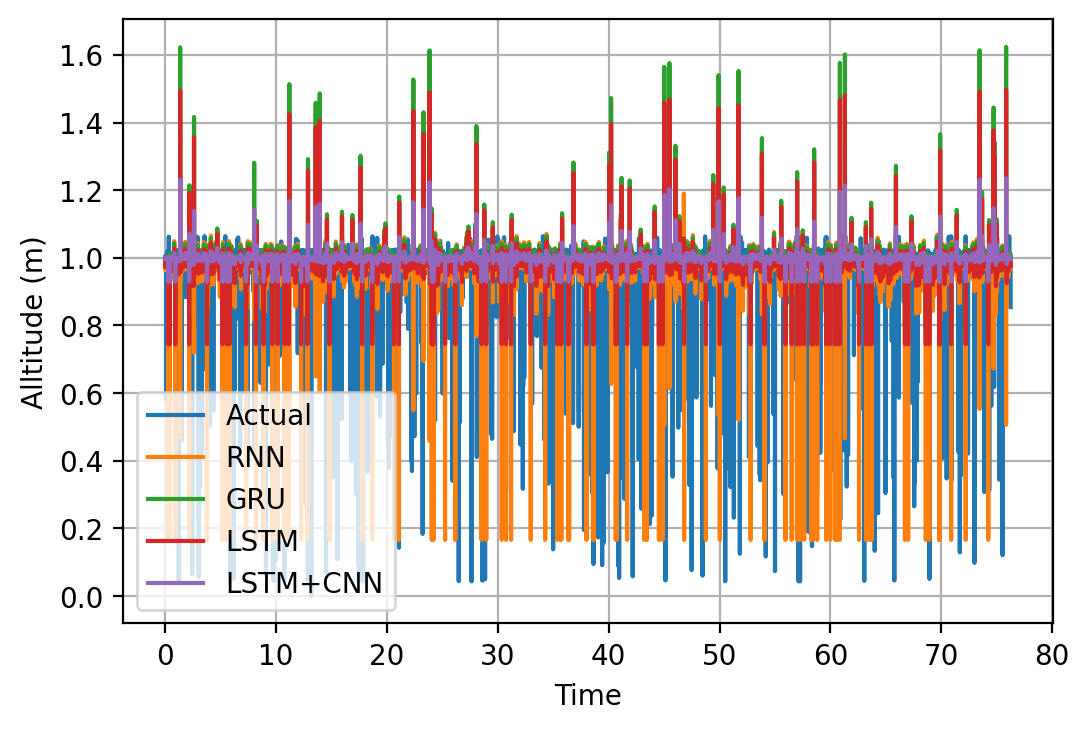

In [320]:
plt.figure(dpi = 200)
plot_series(time_train, ytrain1, 'Actual')
# plot_series(time_test, dnn_forecast)
plot_series(time_train, rnn_forecast, 'RNN')
plot_series(time_train, gru_forecast, 'GRU')
plot_series(time_train, lstm_forecast, 'LSTM')
plot_series(time_train, lstmcnn_forecast, 'LSTM+CNN')
plt.ylabel('Alltitude (m)')
plt.legend()

##### Test Data

#### Metrics

### Second Identification Case

In [ ]:
# each model forecast
dnn_forecast1 = dnns1.predict(xtrain2_tsr)
rnn_forecast1 = rnns1.predict(xtrain2_tsr)
gru_forecast1 = gru1.predict(xtrain2_tsr)
lstm_forecast1 = lstm1.predict(xtrain2_tsr)
lstmcnn_forecast1 = lstmcnn1.predict(xtrain2_tsr)

#### Pitch Velocity

##### Training Data

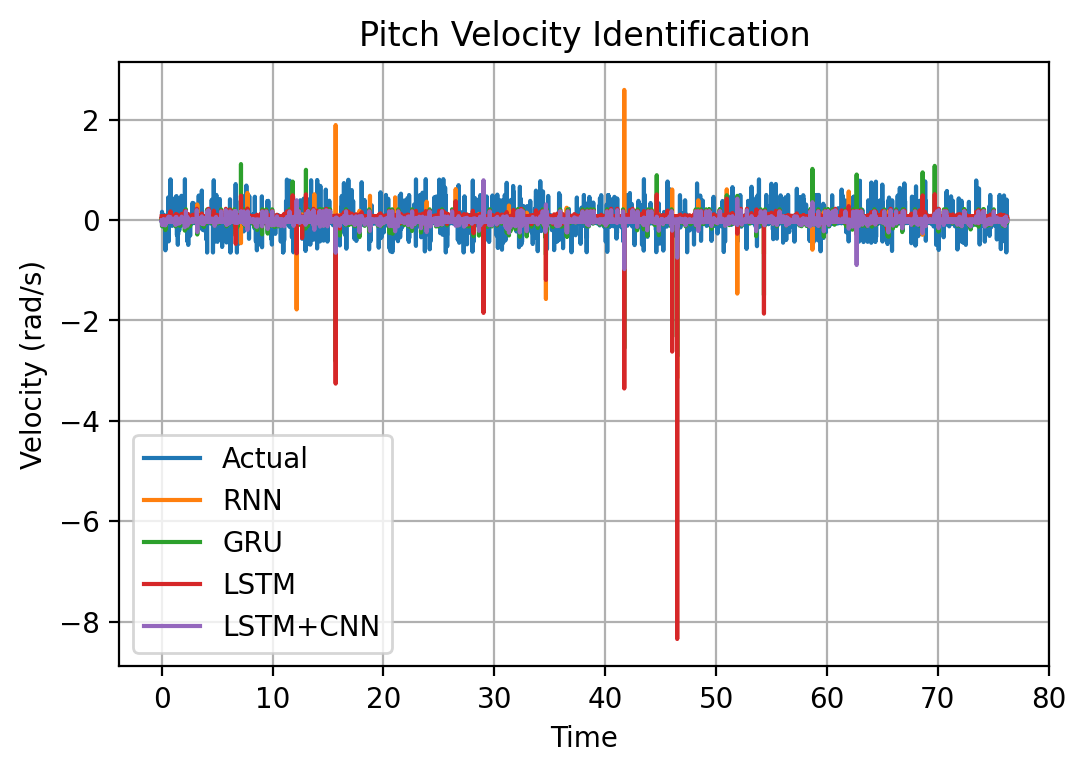

In [316]:
plt.figure(dpi = 200)
plt.title('Pitch Velocity Identification')
plot_series(time_train, ytrain2[:,0], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,1))
plot_series(time_train, rnn_forecast1[:,0], 'RNN')
plot_series(time_train, gru_forecast1[:,0], 'GRU')
plot_series(time_train, lstm_forecast1[:,0], 'LSTM')
plot_series(time_train, lstmcnn_forecast1[:,0], 'LSTM+CNN')
plt.ylabel('Velocity (rad/s)')
plt.legend()

##### Test Data

#### Metrics

#### Yaw Velocity

##### Training Data

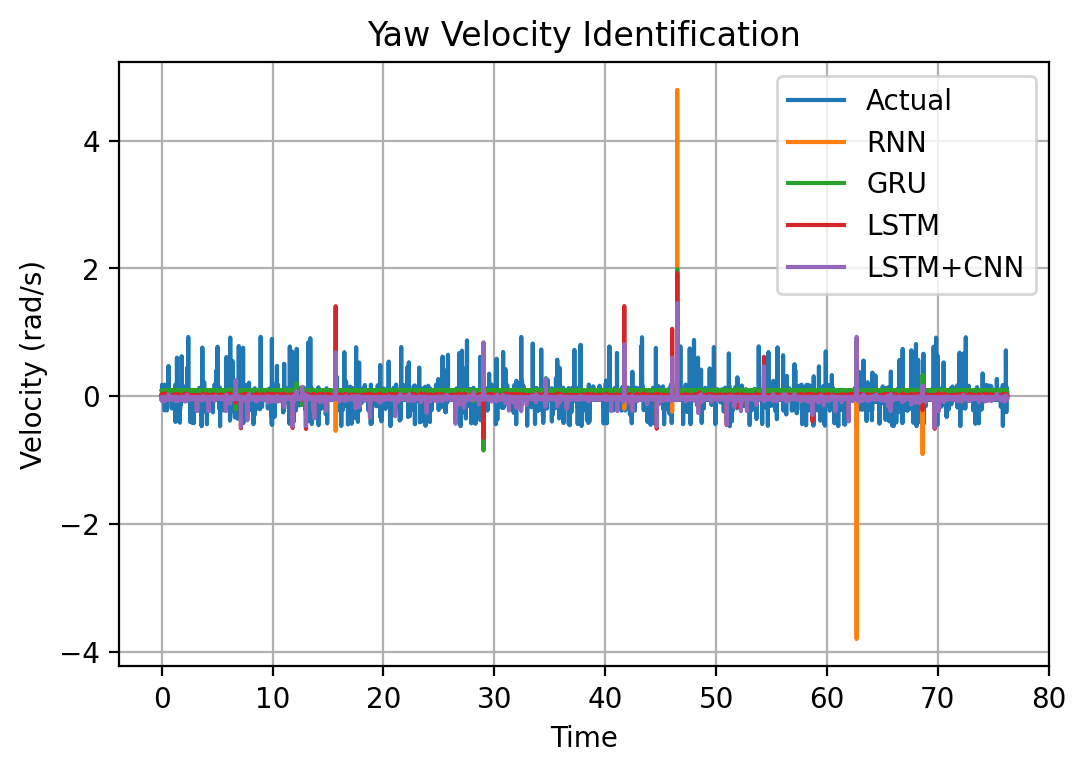

In [317]:
plt.figure(dpi = 200)
plt.title('Yaw Velocity Identification')
plot_series(time_train, ytrain2[:,1], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,2]))
plot_series(time_train, rnn_forecast1[:,1], 'RNN')
plot_series(time_train, gru_forecast1[:,1], 'GRU')
plot_series(time_train, lstm_forecast1[:,1], 'LSTM')
plot_series(time_train, lstmcnn_forecast1[:,1], 'LSTM+CNN')
plt.ylabel('Velocity (rad/s)')
plt.legend()

##### Test Data

#### Metrics

#### Roll Velocity

##### Training Data

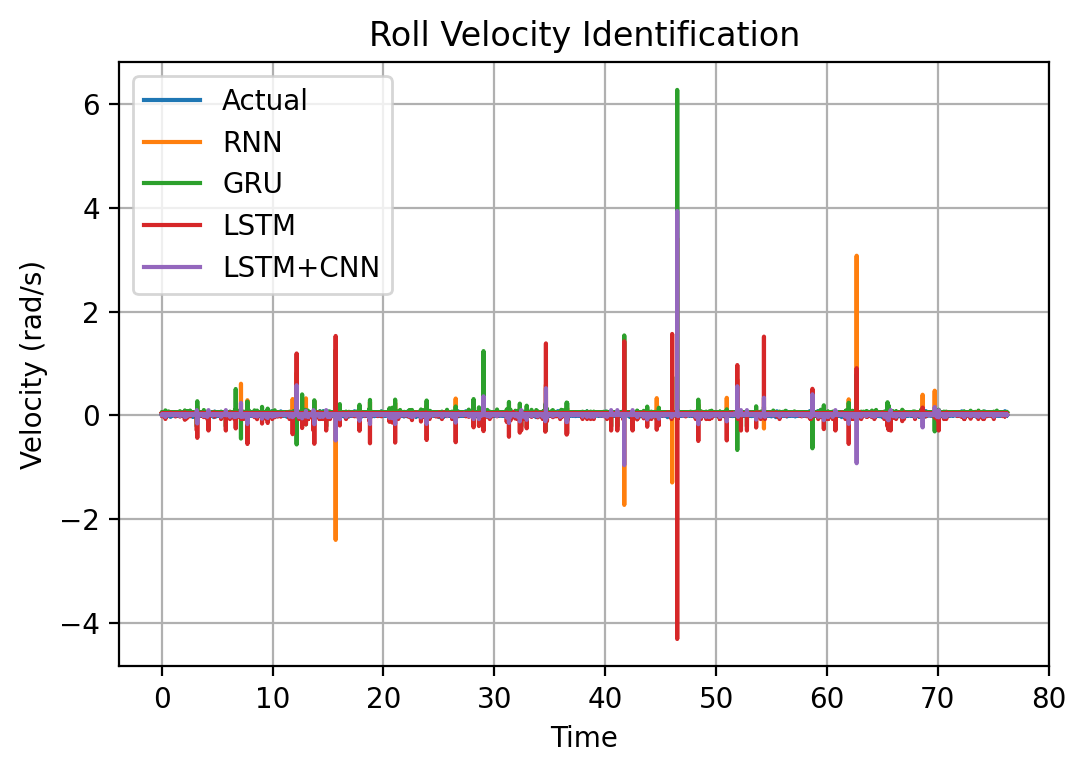

In [319]:
plt.figure(dpi = 200)
plt.title('Roll Velocity Identification')
plot_series(time_train, ytrain2[:,2], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,2]))
plot_series(time_train, rnn_forecast1[:,2], 'RNN')
plot_series(time_train, gru_forecast1[:,2], 'GRU')
plot_series(time_train, lstm_forecast1[:,2], 'LSTM')
plot_series(time_train, lstmcnn_forecast1[:,2], 'LSTM+CNN')
plt.ylabel('Velocity (rad/s)')
plt.legend()

##### Test Data

#### Metrics